## Contents:
- **Introduction**
- **Libraries**
- **EDA: Data Cleaning/Data Exploration/Feature Selection**
- **Cluster Techniques**
- **Conclusion**

# Introduction:
        I am using Mall Customer data to find similarities between the customers based on different features I have available. Here, I will use reduced data using different feature reduction and original data to see the differences, and I am using unsupervised learning to find the similarities between the customers.

## Libraries:

In [67]:
import pandas as pd #for dataframe
import numpy as np #linear algebra libraries
import matplotlib.pyplot as plt #visualization
import seaborn as sns # seaborn for visualization
import math #statistics
import scipy.stats as stats #for ttest
from sklearn.preprocessing import StandardScaler # for standardization and normalization
from sklearn.decomposition import PCA #to reduce Linear dimensionality
from sklearn.preprocessing import normalize #for normalization
from sklearn.preprocessing import scale #for standardization

from sklearn.cluster import KMeans #kmeans clustering
from sklearn.cluster import MiniBatchKMeans #clustering
from sklearn import datasets, metrics #to load the data, metrics

from scipy.cluster.hierarchy import dendrogram, linkage #for dendrogram charts
from sklearn.cluster import AgglomerativeClustering #agglomerative clustering

from sklearn.cluster import DBSCAN #clustering approach

from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture #clustering approach

from sklearn.manifold import TSNE #dimension reduction approach

import umap #dimension reduction approach
import time #to find running time

import warnings
warnings.filterwarnings("ignore")

## Reading CSV file:

In [68]:
mall_customer = pd.read_csv('Mall_Customers.csv') #reading csv file
mall_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Copying the file to make any changes:

In [69]:
#copy the file first
mall_customer_c = mall_customer.copy()

### Info: to find the nature of data:

In [70]:
mall_customer_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Observation:
- There is total of 200 rows, and 5 columns.
- All the features looks non-null.
- Dtypes of int and object.
- memory usage of 7.9+ KB

## EDA:
Exploratory Data Analysis:

### Data Exploration:

#### Describing all the descriptive statictics:

In [71]:
mall_customer_c.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Observation:
- All the statistics looks okay.
- Maximum age is of 70, maximum annual income is 137k, and maximum spending score is 99.
- Minimum age is 18, minimum annual income is 15k, and minimum spending score is 1.

In [72]:
#chaecking for unique gender:
mall_customer_c['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Distribution of spending score:

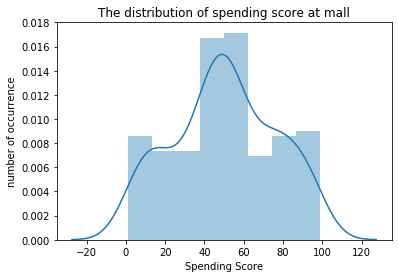

In [73]:
#plottinf figure
sns.distplot(mall_customer_c['Spending Score (1-100)'])
plt.title("The distribution of spending score at mall")
plt.xlabel("Spending Score")
plt.ylabel("number of occurrence")
plt.show()

observation:
- looks kind of normal, but little skwed to right.
- not normally distributed.

#### Outliers:
Looking for any outliers using BoxPlot Visualization

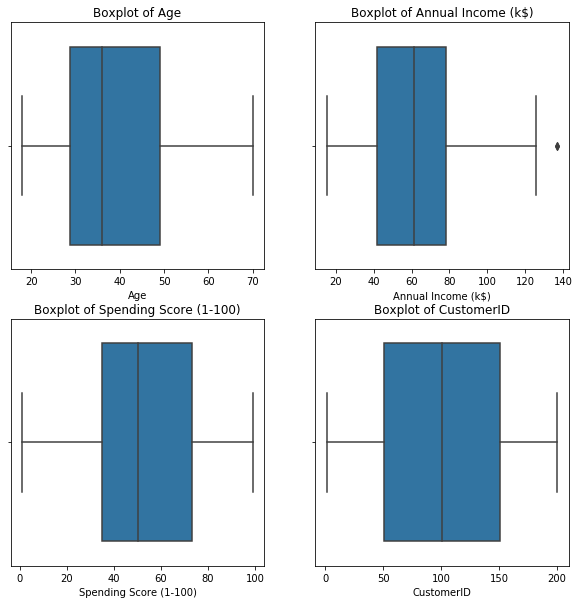

In [74]:
#plotting figure with figure size
plt.figure(figsize=(10,10))

#subpoltting the graphs
plt.subplot(2,2,1)
sns.boxplot(mall_customer_c['Age'])
plt.title("Boxplot of Age")

plt.subplot(2,2,2)
sns.boxplot(mall_customer_c['Annual Income (k$)'])
plt.title("Boxplot of Annual Income (k$)")

plt.subplot(2,2,3)
sns.boxplot(mall_customer_c['Spending Score (1-100)'])
plt.title("Boxplot of Spending Score (1-100)")

plt.subplot(2,2,4)
sns.boxplot(mall_customer_c['CustomerID'])
plt.title("Boxplot of CustomerID")

plt.show()

Observation:
- No outliers seen for Age, Spending Score and ID
- One outlier for Annual Income.

### checking for frequency of gender using visualization:

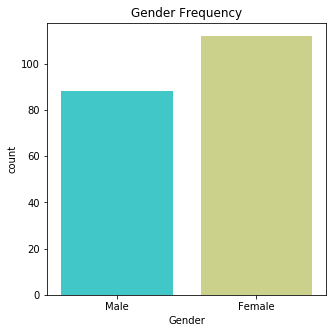

In [75]:
#countplot to see frequency of gender
plt.figure(figsize = (5, 5))
sns.countplot(mall_customer_c['Gender'], data= mall_customer_c, 
            palette='rainbow')
plt.title("Gender Frequency")
plt.show()

Observation:
- Female frequency is higher than male, which makes sense as female tend to shop higher than male.

### Visualization of all the features' correlation to eachother:

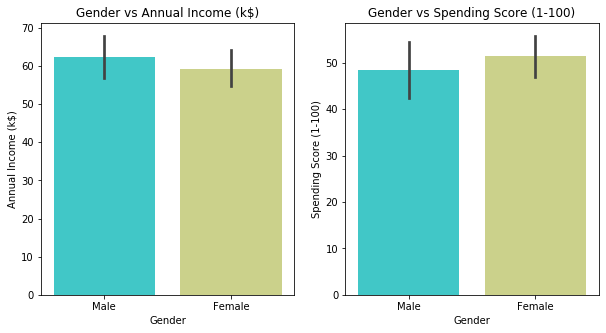

In [76]:
#finding ground relation of each features to target using histogram
#plotting figure 
plt.figure(figsize=(10,5))

#subplts for visualization

plt.subplot(1,2,1)
sns.barplot(mall_customer_c['Gender'], mall_customer_c['Annual Income (k$)'], data= mall_customer_c, palette='rainbow')
plt.title("Gender vs Annual Income (k$)")


plt.subplot(1,2,2)
sns.barplot(mall_customer_c['Gender'], mall_customer_c['Spending Score (1-100)'], data= mall_customer_c, palette='rainbow')
plt.title("Gender vs Spending Score (1-100)")


plt.show()


Observation:
- Higher Annual Income for male than female.
- Higher Spending Score of Female than Male.

### Regplot for other features:

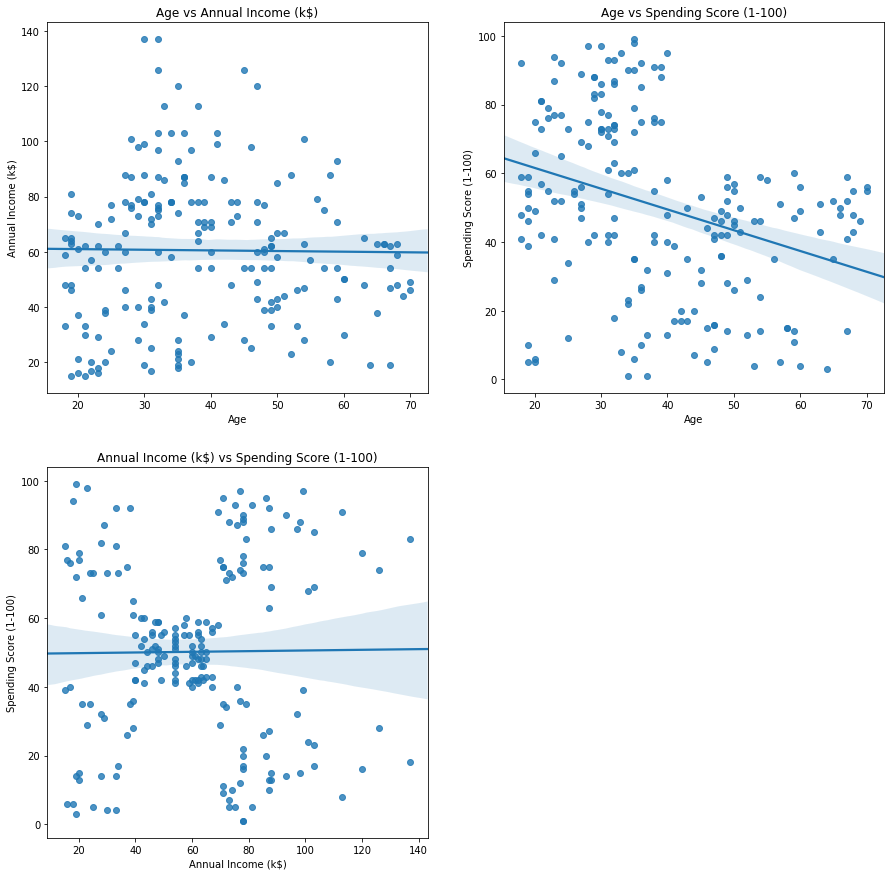

In [77]:
#finding ground relation of each features to target using regplot
#plotting figure 
plt.figure(figsize=(15,15))

#subplts for visualization

plt.subplot(2,2,1)
sns.regplot(mall_customer_c['Age'], mall_customer_c['Annual Income (k$)'], data= mall_customer_c)
plt.title("Age vs Annual Income (k$)")

plt.subplot(2,2,2)
sns.regplot(mall_customer_c['Age'], mall_customer_c['Spending Score (1-100)'], data= mall_customer_c)
plt.title("Age vs Spending Score (1-100)")

plt.subplot(2,2,3)
sns.regplot(mall_customer_c['Annual Income (k$)'], mall_customer_c['Spending Score (1-100)'], data= mall_customer_c)
plt.title("Annual Income (k$) vs Spending Score (1-100)")

plt.show()


Observation:
- Spending Score decreases by Age, shows correlation, with some exception. There is some people who spend lower in lower age too.
- Income and Age is kind of going almost without change with some exceptions.
- Spending Score and Income shows little correlation too as the line goes straight.

## Feature Selection:

### Correlation matrix: to see correlation between features:

In [78]:
mall_customer_c.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Observation:
- Higher correlation of Annual Income to Customer ID, as number increases income increases too.
- We see  there is no other correlation at all.

### Visualization of correlation using sns:

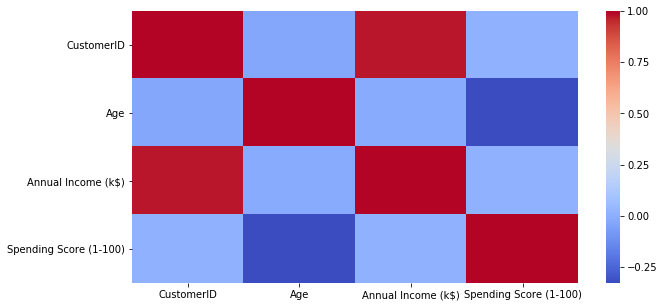

In [79]:
#plotting sns figure for correlation without region features
plt.figure(figsize=(10,5))
sns.heatmap(mall_customer_c.corr(),cmap='coolwarm')

Observation:
- Same as before all of features are correlated to each other with minimal number.

### One-hot coding to change categorical to numerical:

In [80]:
# Using dummy changing gender to numerical
mall_customer_c["is_female"] = pd.get_dummies(mall_customer_c.Gender, drop_first=True)

In [81]:
#checking the data
mall_customer_c.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),is_female
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


## Applying dimensionality reduction techniques to visualize the observations:

### Using PCA(Principal Components Analysis):
- always normalize beforehand.
- PCA retains the global similarity structure of the data and hence dissimilar objects tend to be located far away from each other in the lower-dimensional representation.
- PCA is relatively weak in retaining the local similarities in the low-dimensional representation.
-  for linear dimension.

### Using all the features:

In [82]:
x = mall_customer_c.iloc[:, 2: ]
x.shape

(200, 4)

In [83]:
#Standarizing the features first
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

In [123]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100),is_female
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


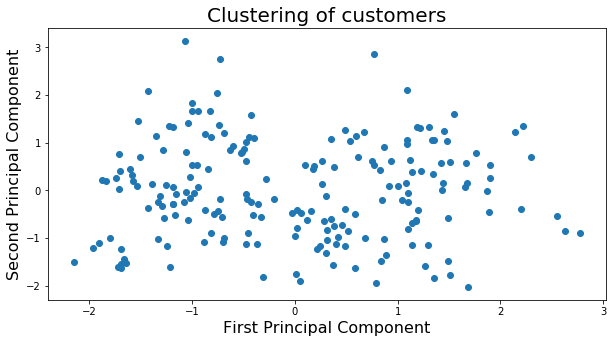

In [147]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std) 
    

plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.title('Clustering of customers',fontsize=20)
plt.xlabel('First Principal Component',fontsize=16)
plt.ylabel('Second Principal Component',fontsize=16)
plt.show()

Observation:
- We could see that data are all dispersed and really hard to see grouping.

### Using t-SNE(t-Distributed Stochastic Neighbor Embedding):
- for small datasets.
- takes longer time.
- new algorithm.
- measures the similarity between the data points both in high-dimensional space and low-dimensional space and then tries to minimize the divergence between the two similarities calculated in the high and the low dimensional spaces.
- is non-linear method.


### Using all the features:

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.099897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.985500
[t-SNE] KL divergence after 300 iterations: 0.399917
t-SNE done! Time elapsed: 0.477017879486084 seconds


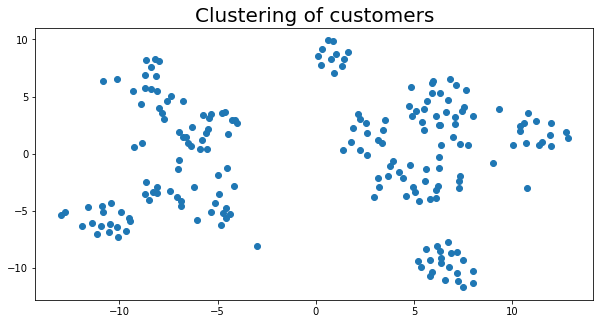

In [152]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


plt.figure(figsize=(10,5))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('Clustering of customers',fontsize=20)
plt.xlabel('First Principal Component',fontsize=16)
plt.ylabel('Second Principal Component',fontsize=16)

plt.show()

Observation:
- We could see some clustering easily here.

#### Using different perplexity and n_iter:

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.099897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.087307
[t-SNE] KL divergence after 800 iterations: 0.223829
t-SNE done! Time elapsed: 0.9807529449462891 seconds


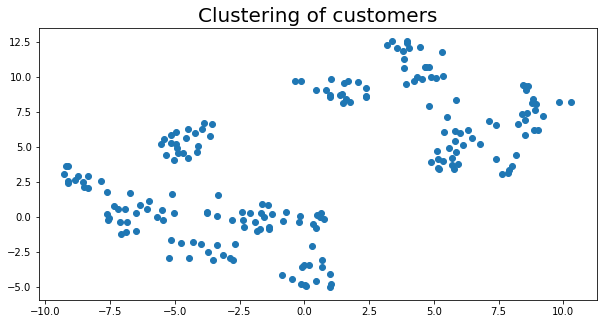

In [153]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('Clustering of customers',fontsize=20)
plt.xlabel('First Principal Component',fontsize=16)
plt.ylabel('Second Principal Component',fontsize=16)

plt.show()

Observation:
- Using perplexity 40 and n_iter of 1000 times, we could visualize groups better than before.

### Using UMAP(Uniform Manifold Approximation and Projection):
- similar to t-SNE, but faster.
- non-linear method.
- slower than PCA.
- used for any purpose PCA does.
- betetr than t-SNE to capture local similarities.

UMAP done! Time elapsed: 0.3549168109893799 seconds


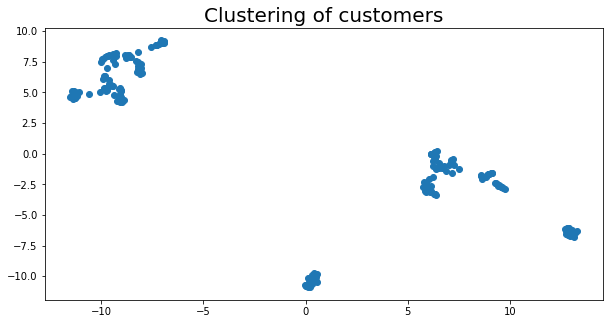

In [203]:
time_start = time.time() #for timing

umap_results = umap.UMAP(n_neighbors=15,
                      min_dist=0.1,
                      metric='euclidean').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

#plotting figure
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.title('Clustering of customers',fontsize=20)
plt.xlabel('First Principal Component',fontsize=16)
plt.ylabel('Second Principal Component',fontsize=16)

plt.show()

Observation:
- Here, we can see grous better than other reduction method. so I will be using this method.

## Cluster Techniques:


### Apply clustering techniques to group together similar observations.

### - Using K-means:

#### Finding best hyperparameter to use inertia and clusters for elbow:

Text(0, 0.5, 'Inertia')

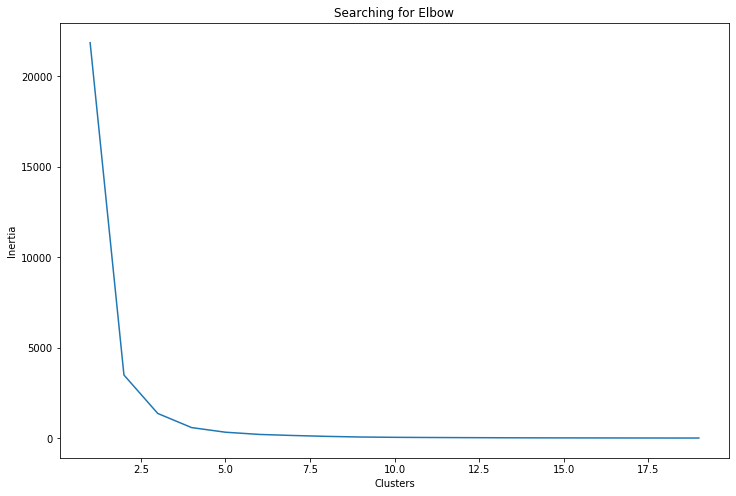

In [437]:
clusters = []

for i in range(1, 20):
    km = KMeans(n_clusters=i).fit(umap_results)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Elbow between 4 and 7 whichever gives me better score.

#### Using UMAP reduced data for KMeans clustering:

#### Finding Silhouette score:
- 3 or 4 which one gives me better score:

In [719]:
label_3 = KMeans(n_clusters=3, random_state=123).fit_predict(umap_results)
label_4 = KMeans(n_clusters=4, random_state=123).fit_predict(umap_results)
label_5 = KMeans(n_clusters=5, random_state=123).fit_predict(umap_results)

print(metrics.silhouette_score(umap_results, label_3, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_4, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_5, metric='euclidean'))

0.79168427
0.8217177
0.68890935


- From above cluster with 4 gives me better score, so I will use this number.

21.2 ms ± 993 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


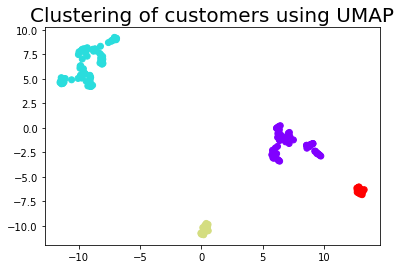

In [313]:
#UMAP data with 4 clusters
k_means = KMeans(n_clusters=4, random_state=123)
%timeit k_means.fit(umap_results)
y_pred = k_means.predict(umap_results)

# Plot the solution.
plt.scatter(umap_results[:,0], umap_results[:,1], c=y_pred, cmap = 'rainbow')
plt.title('Clustering of customers using UMAP',fontsize=20)
plt.xlabel('First Principal Component',fontsize=16)
plt.ylabel('Second Principal Component',fontsize=16)

plt.show()

### Now finding better n_cluster for original data (x), using all the features:

Text(0, 0.5, 'Inertia')

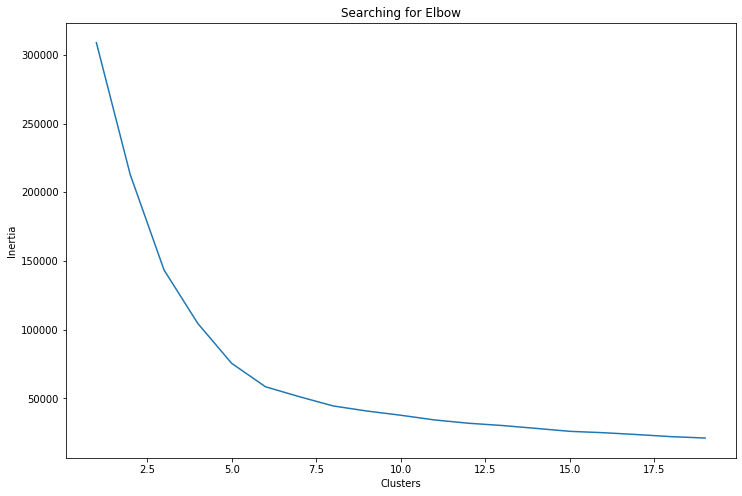

In [439]:
clusters = []

for i in range(1, 20):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

- From the graph, we can see n_cluster between 3 to 6.

### KMeans cluster Using Annual Income and Spending score:

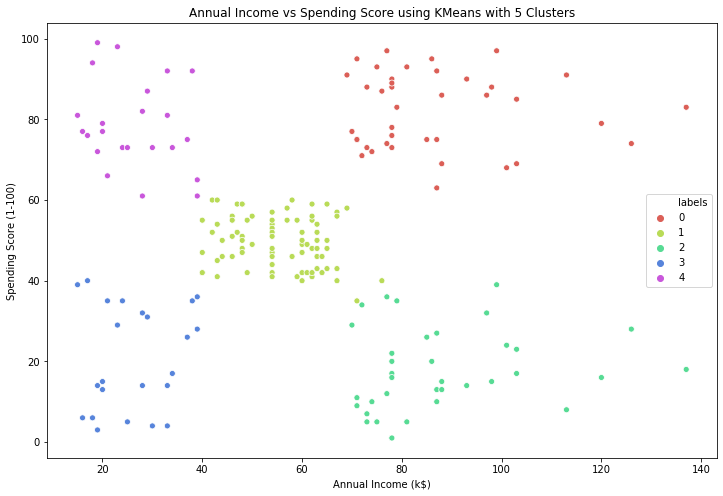

0.443430209791173


In [429]:
#cluster 5 
k_means = KMeans(n_clusters=5).fit(x)
%timeit 
y_pred = k_means.predict(x)

X['labels'] = k_means.labels_

# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=X['labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Annual Income vs Spending Score using KMeans with 5 Clusters')
plt.show()


label_as = KMeans(n_clusters=5, random_state=123).fit_predict(x)
print(metrics.silhouette_score(x, label_as, metric='euclidean'))


Observation:
- After using different number of clusters, I found that n_cluster = 5 gave me proper division of groups, it could be groups of:
    1. Lower Income with Higher Spending
    2. Lower Income with Lower Spending
    3. Mid-Income with Mid-spending
    4. Lower Income with HIgher Spending
    5. Higher Income with Lower Spending
- Silhoutte score of 0.44

### KMeans cluster Using Age and Spending score:

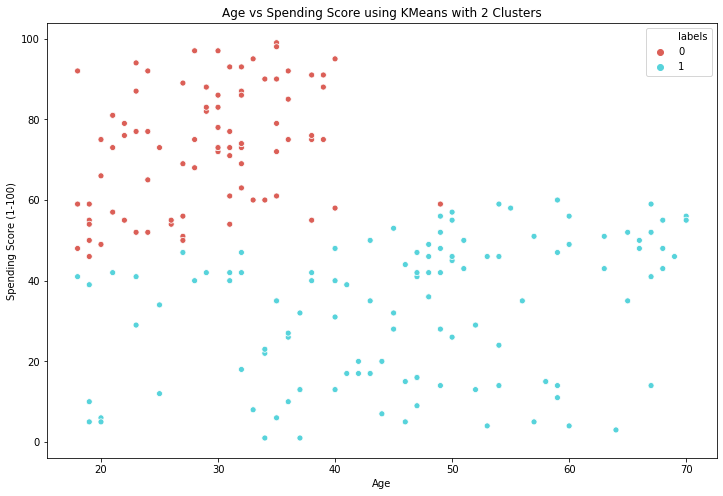

0.29307334005502633


In [441]:
#using 2 clusters only
k_means = KMeans(n_clusters=2).fit(x)
%timeit 
y_pred = k_means.predict(x)

X['labels'] = k_means.labels_


# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Age'], x['Spending Score (1-100)'], hue=X['labels'], 
                palette=sns.color_palette('hls', 2))
plt.title('Age vs Spending Score using KMeans with 2 Clusters')
plt.show()


label_ags = KMeans(n_clusters=2, random_state=123).fit_predict(x)
print(metrics.silhouette_score(x, label_ags, metric='euclidean'))


Observation:
- I tried using different number of clusters from 2 to 7, n_cluster = 2, gave me proper division of groups.
    1. Lower age with higher spending
    2. all age with lower spending
- It has Silhoutte score of 0.29

### KMeans cluster Using Age and Annual Income:

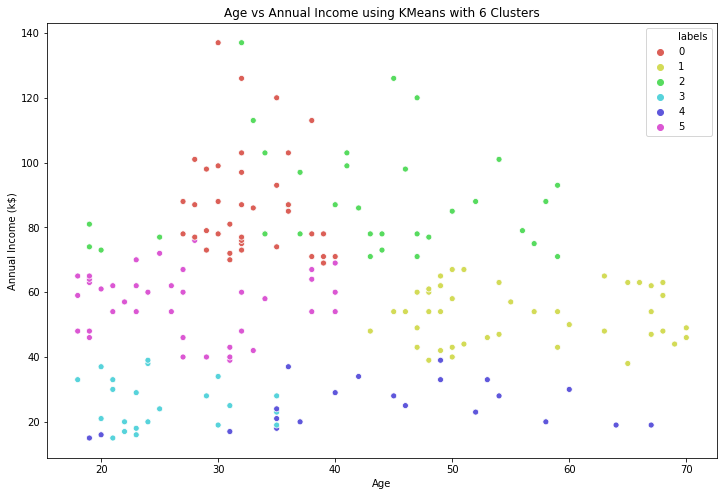

0.45205475380756527


In [435]:
k_means = KMeans(n_clusters=6).fit(x)
%timeit 
y_pred = k_means.predict(x)

X['labels'] = k_means.labels_


# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Age'], x['Annual Income (k$)'], hue=X['labels'], 
                palette=sns.color_palette('hls', 6))
plt.title('Age vs Annual Income using KMeans with 6 Clusters')
plt.show()

label = KMeans(n_clusters=6, random_state=123).fit_predict(x)
print(metrics.silhouette_score(x, label, metric='euclidean'))


Observation:
- After using several number of cluster, n_cluster = 6 gave me better division of groups with some noises:
    1. Lower Age with Lower Income
    2. Lower Age with Mid-Income
    3. Age between 30 to 40 with Higher Income
    4. Age betweeen 40 to 50 with Mid to High Income
    5. Higher Age with Lower Income
    6. Higher Age with Mid Income
- Silhoutte Score of 0.45

### Using Hierarchical clustering:
- AgglomerativeCLustering:
   - 

### Using UMAP feature:


#### Silhouette score:

In [463]:
label_w3 = AgglomerativeClustering(n_clusters=3).fit_predict(umap_results)
label_w4 = AgglomerativeClustering(n_clusters=4).fit_predict(umap_results)
label_w5 = AgglomerativeClustering(n_clusters=5).fit_predict(umap_results)
label_w6 = AgglomerativeClustering(n_clusters=6).fit_predict(umap_results)
label_w7 = AgglomerativeClustering(n_clusters=7).fit_predict(umap_results)
label_w1 = AgglomerativeClustering(n_clusters=10).fit_predict(umap_results)

print(metrics.silhouette_score(umap_results, label_w3, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_w4, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_w5, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_w6, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_w7, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_w1, metric='euclidean'))


0.79168427
0.8217177
0.68890935
0.648225
0.6843978
0.71376526


- From above we can see that, cluster with 4 gives us higher Silhoutte score.

#### Looking for dendrogram:

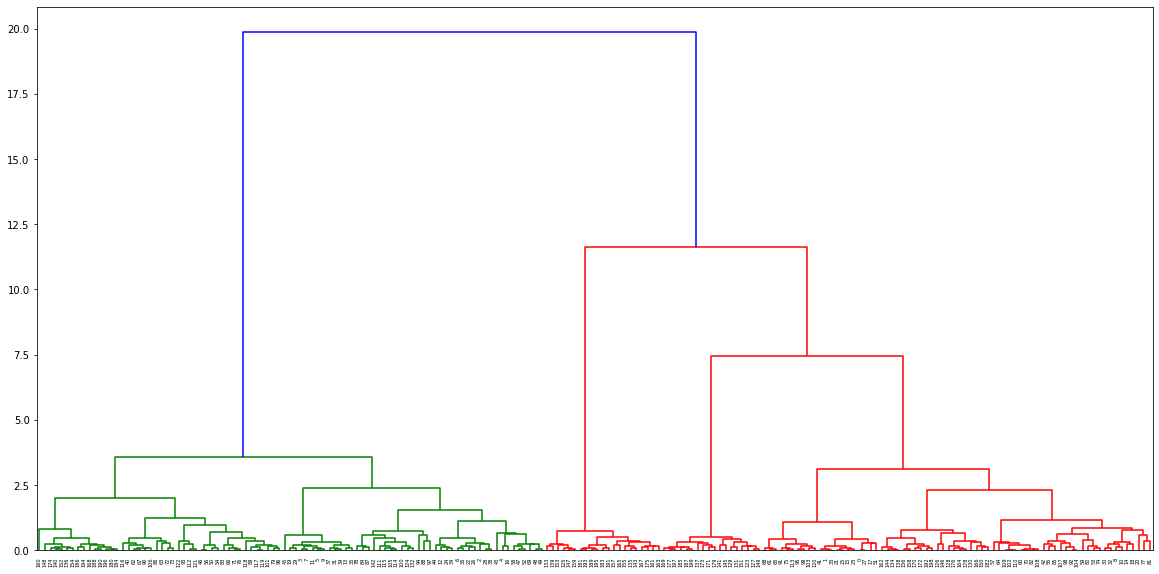

In [455]:
#using average method and umap_results
plt.figure(figsize=(20,10))
dendrogram(linkage(umap_results, method='average'))
plt.show()

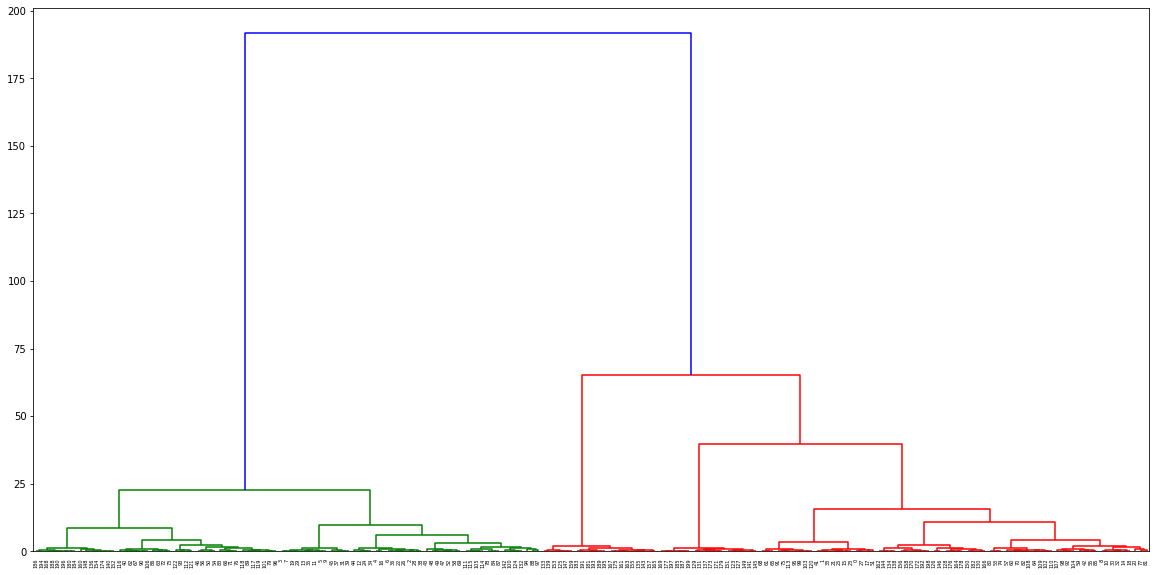

In [456]:
#using ward method and umap_results
plt.figure(figsize=(20,10))
dendrogram(linkage(umap_results, method='ward'))
plt.show()

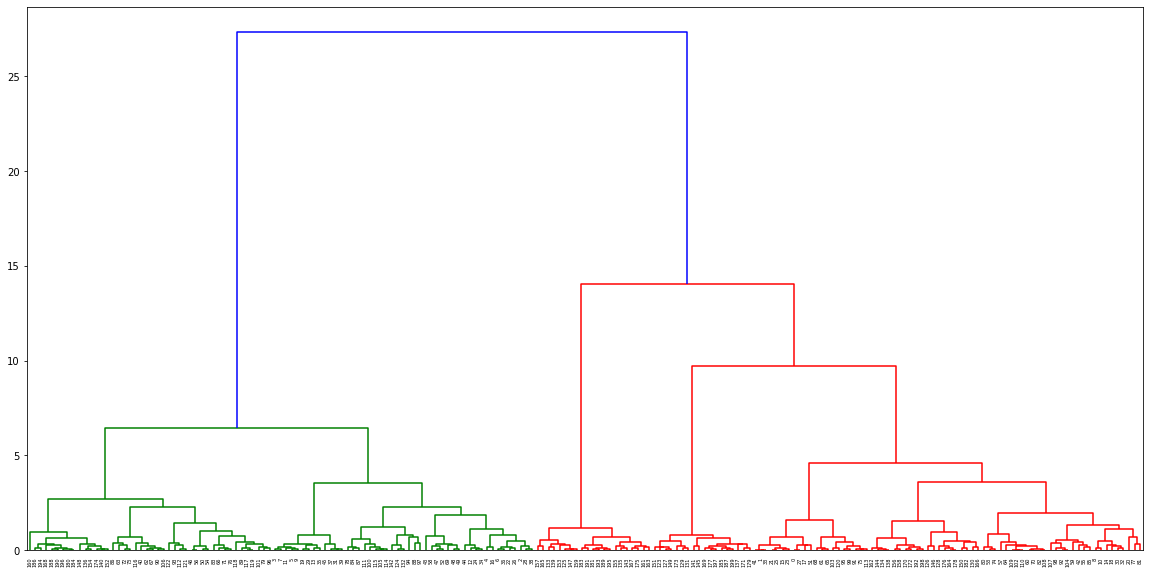

In [457]:
#using complete method and umap_results
plt.figure(figsize=(20,10))
dendrogram(linkage(umap_results, method='complete'))
plt.show()

- Average or complete linkage looks better than ward, we see lower branches better in average and complete, so I will use complete/average

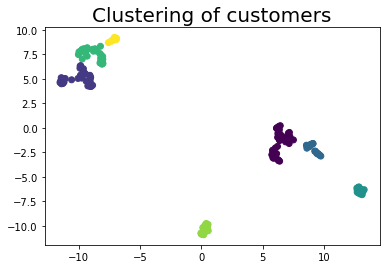

In [718]:
# Defining the agglomerative clustering using average linkage and n_cluster of 7
agg_clusters = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=7)

# Fit model
clusters = agg_clusters.fit_predict(umap_results)

# Plot the solution.
plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.title('Clustering of customers',fontsize=20)

plt.show()

### Using all original data, x:

#### Finding Silhoutte Score:

In [473]:

label_a2 = AgglomerativeClustering(n_clusters=2).fit_predict(x)
label_a3 = AgglomerativeClustering(n_clusters=3).fit_predict(x)
label_a4 = AgglomerativeClustering(n_clusters=4).fit_predict(x)
label_a5 = AgglomerativeClustering(n_clusters=5).fit_predict(x)
label_a6 = AgglomerativeClustering(n_clusters=6).fit_predict(x)
label_a7 = AgglomerativeClustering(n_clusters=7).fit_predict(x)
label_a8 = AgglomerativeClustering(n_clusters=8).fit_predict(x)


print(metrics.silhouette_score(x, label_a2, metric='euclidean'))
print(metrics.silhouette_score(x, label_a3, metric='euclidean'))
print(metrics.silhouette_score(x, label_a4, metric='euclidean'))
print(metrics.silhouette_score(x, label_a5, metric='euclidean'))
print(metrics.silhouette_score(x, label_a6, metric='euclidean'))
print(metrics.silhouette_score(x, label_a7, metric='euclidean'))
print(metrics.silhouette_score(x, label_a8, metric='euclidean'))


0.29916602844367
0.3812859576468096
0.4102091359195185
0.43997527212476695
0.4428008535928764
0.42593881050851595
0.4223297424559345


#### dendrogram for original data, x:

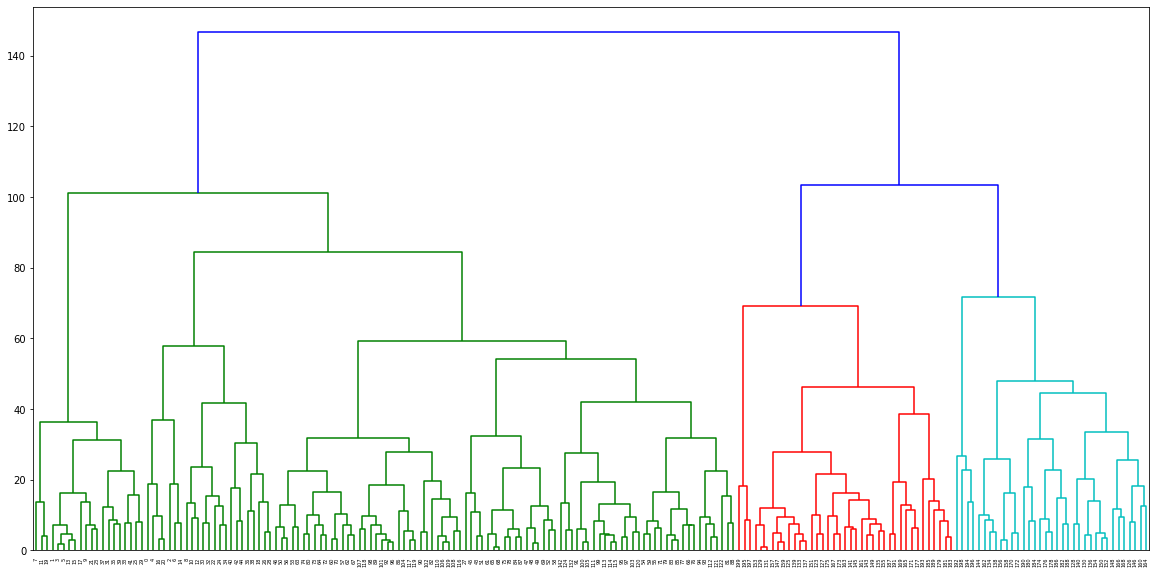

In [499]:
plt.figure(figsize=(20,10))
dendrogram(linkage(x, method='complete'))
plt.show()

### AgglomerativeClustering Using Annual Income and Spending score:

The silhoutte score of the Agglomerative Clustering: 0.4141207457542422


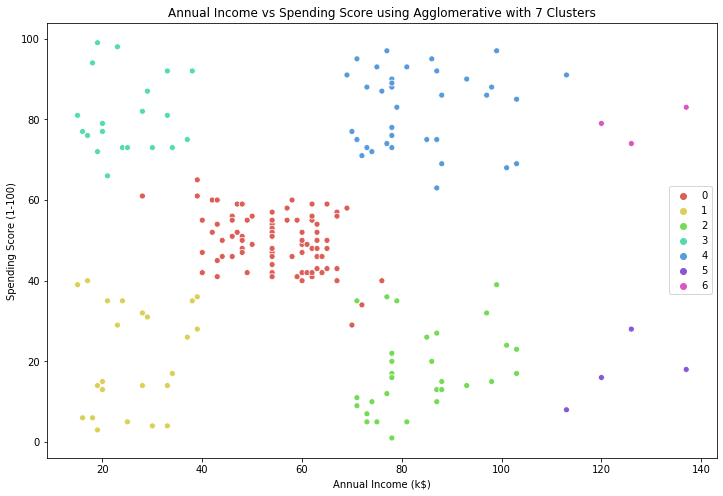

In [528]:


# Defining the agglomerative clustering
agg_clusters = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=7)
# Fit model
clusters = agg_clusters.fit_predict(x)

print("The silhoutte score of the Agglomerative Clustering: {}"
      .format(metrics.silhouette_score(x, clusters, metric='euclidean')))


# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=clusters, 
                palette=sns.color_palette('hls', 7))
plt.title('Annual Income vs Spending Score using Agglomerative with 7 Clusters')
plt.show()



Observation:
- With n_cluster = 7, I could see more define groups,
    1. Lower Income and Lower Spending
    2. Lower Income and Higher Spending
    3. Mid Income and Mid Spending
    4. Higher Income and Lower Spending
    5. Higher Income and Higher Spending
    6. Income > 100 and Lower Spending
    7. Income > 100 and Higher Spending
- Silhoutte Score is 0.41

### AgglomerativeClustering Using Age and Spending score:

The silhoutte score of the Agglomerative Clustering: 0.4102091359195185


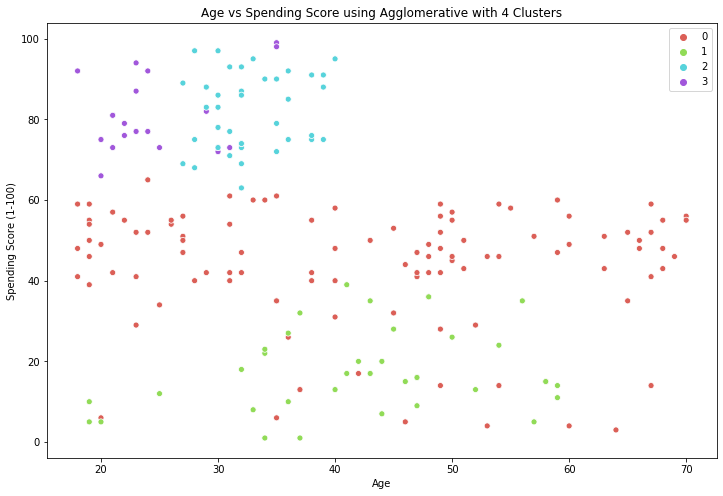

In [549]:

# Defining the agglomerative clustering
agg_clusters = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=4)

# Fit model
clusters = agg_clusters.fit_predict(x)

print("The silhoutte score of the Agglomerative Clustering: {}"
      .format(metrics.silhouette_score(x, clusters, metric='euclidean')))

# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Age'], x['Spending Score (1-100)'], hue=clusters, 
                palette=sns.color_palette('hls', 4))
plt.title('Age vs Spending Score using Agglomerative with 4 Clusters')
plt.show()

Observation:
- Lots of noise seen.
- Tried different cluster but n_cluster = 4 looks better than others.
- 4 groups: Younger with Higher Spending, Age between 30 and 40 with higher spending, all ages with mid spending and all ages with lower spending.
- The distribution of spending in regard to age is really hard to be grouped in some category.
- Silhoutte score is 0.41.


### AgglomerativeClustering Using Age and Annual Income:

The silhoutte score of the Agglomerative Clustering: 0.29916602844367


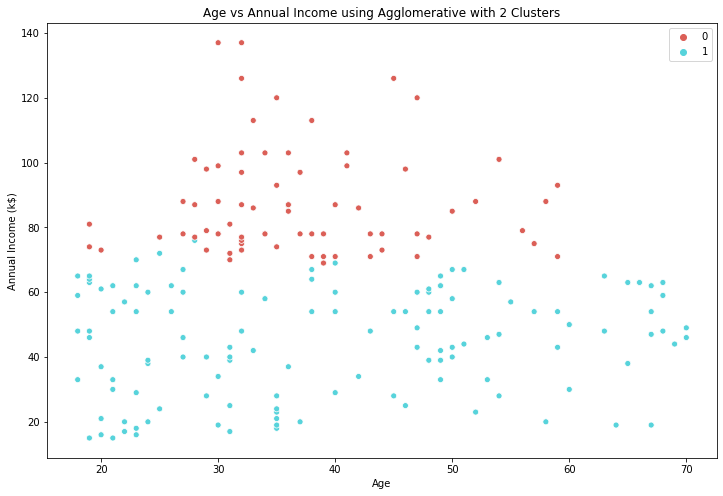

In [554]:

# Defining the agglomerative clustering
agg_clusters = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_clusters.fit_predict(x)

print("The silhoutte score of the Agglomerative Clustering: {}"
      .format(metrics.silhouette_score(x, clusters, metric='euclidean')))

# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Age'], x['Annual Income (k$)'], hue=clusters, 
                palette=sns.color_palette('hls', 2))
plt.title('Age vs Annual Income using Agglomerative with 2 Clusters')
plt.show()

Observation:
- Lots of noise when n_cluster 6 was used, better with n_cluster = 2
- Groups with: Higher Income any age and Lower Income any age.
- Silhoutte score of 0.3

### Using density-based spatial clustering of applications with noise (DBSCAN):
- DBSCAN:

### Using UMAP:

Finding Silhoutte Score:

In [693]:
label_d2 = DBSCAN(eps=2, min_samples=7).fit_predict(umap_results)
label_d3 = DBSCAN(eps=1, min_samples=7).fit_predict(umap_results)
label_d4 = DBSCAN(eps=0.8, min_samples=7).fit_predict(umap_results)
label_d5 = DBSCAN(eps=2, min_samples=10).fit_predict(umap_results)
label_d6 = DBSCAN(eps=1, min_samples=10).fit_predict(umap_results)
label_d7 = DBSCAN(eps=0.5, min_samples=10).fit_predict(umap_results)
label_d8 = DBSCAN(eps=2, min_samples=5).fit_predict(umap_results)
label_d9 = DBSCAN(eps=1, min_samples=5).fit_predict(umap_results)
label_d1 = DBSCAN(eps=0.5, min_samples=5).fit_predict(umap_results)

print(metrics.silhouette_score(umap_results, label_d2, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_d3, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_d4, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_d5, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_d6, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_d7, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_d8, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_d9, metric='euclidean'))
print(metrics.silhouette_score(umap_results, label_d1, metric='euclidean'))


0.8217177
0.77845794
0.6415073
0.8217177
0.77845794
0.5976499
0.8217177
0.77845794
0.67098254


- So eps = 2 is better for any min_samples.

The silhouette score of the DBSCAN solution: 0.6973008513450623


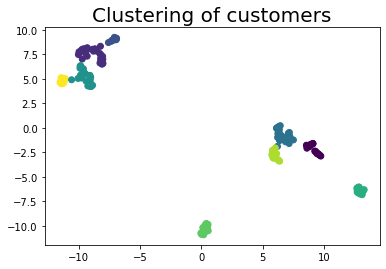

In [708]:

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=0.7, min_samples=7)

# Fit model
clusters = dbscan_cluster.fit_predict(umap_results)

print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))


# Plot the solution.
plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.title('Clustering of customers',fontsize=20)

plt.show()

- Can see 9 different clusters.

#### Finding Silhoutte Score for original data:

In [622]:
label_x2 = DBSCAN(eps=11).fit_predict(x)
label_x3 = DBSCAN(eps=20).fit_predict(x)
label_x4 = DBSCAN(eps=18).fit_predict(x)
label_x5 = DBSCAN(eps=9).fit_predict(x)
label_x6 = DBSCAN(eps=15).fit_predict(x)

print(metrics.silhouette_score(x, label_x2, metric='euclidean'))
print(metrics.silhouette_score(x, label_x3, metric='euclidean'))
print(metrics.silhouette_score(x, label_x4, metric='euclidean'))
print(metrics.silhouette_score(x, label_x5, metric='euclidean'))
print(metrics.silhouette_score(x, label_x6, metric='euclidean'))


0.15950489369586132
0.35876072055574126
0.3692256107813
0.07660613388790788
0.2719680877784539


### DBSCAN Using Annual Income and Spending score:

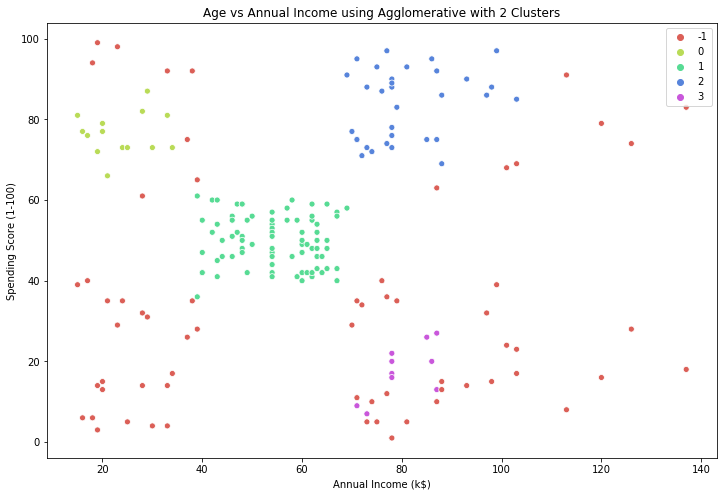

In [639]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=11, min_samples=6)

# Fit model
clusters = dbscan_cluster.fit_predict(x)



# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=clusters, 
                palette=sns.color_palette('hls', np.unique(clusters).shape[0]))
plt.title('Annual Income vs spending score using DBSCAN')
plt.show()



Observation:
- -1 looks like outlier/noise
- 0 to 4 with 5 groups.
- eps > 11 gives us only 4 groups with outliers, but has higher score.

### DBSCAN Using Age and Spending score:

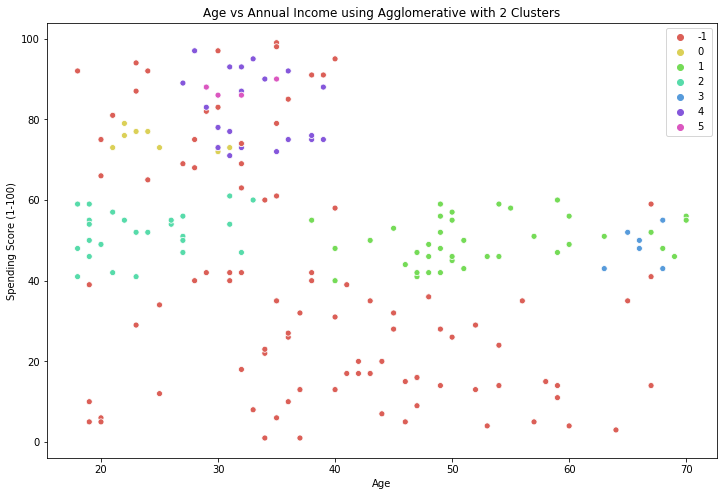

In [646]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=9, min_samples=6)

# Fit model
clusters = dbscan_cluster.fit_predict(x)



# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Age'], x['Spending Score (1-100)'], hue=clusters, 
                palette=sns.color_palette('hls', np.unique(clusters).shape[0]))
plt.title('Age vs spending score using DBSCAN')
plt.show()



Observation:
- lots of outliers.
- Can see few groups:
    - Younger age with Higher spending, Younger age with mid spending, 30-40 age with higher spending, higher age with mid spending, age between 60-70 with mid spending and lots outliers with same lower spending in all ages.

### DBSCAN  Using Age and Annual Income:

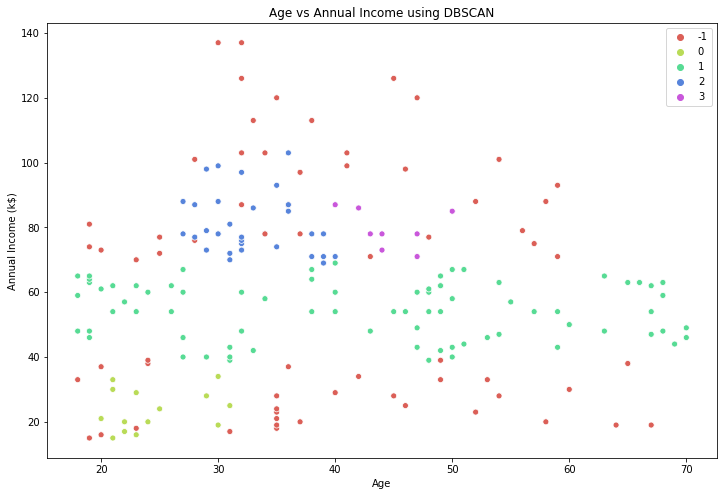

In [655]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=11, min_samples=6)

# Fit model
clusters = dbscan_cluster.fit_predict(x)



# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Age'], x['Annual Income (k$)'], hue=clusters, 
                palette=sns.color_palette('hls', np.unique(clusters).shape[0]))
plt.title('Age vs Annual Income using DBSCAN')
plt.show()




Observation:
- lots of outliers.
- Groups divided to: Younger with lower Income, All ages with mid income, ages between 30 to 40 with higher Income, and 40 to 50 with higher income, outliers of ages after 30 with lower income and all ages with higehr income.


### Using Gaussian Mixture Models (GMM):

In [656]:
#Using GridSearchCV


param_grid = {'n_components': np.arange(2, 20, 1), 
              'covariance_type':['full', 'tied', 'diag', 'spherical']}
grid = GridSearchCV(GaussianMixture(), param_grid=param_grid, cv=10)
grid.fit(X_std)
print(f"best parameters: {grid.best_params_}")


best parameters: {'covariance_type': 'diag', 'n_components': 5}


The silhouette score of the GMM: 0.6821916103363037


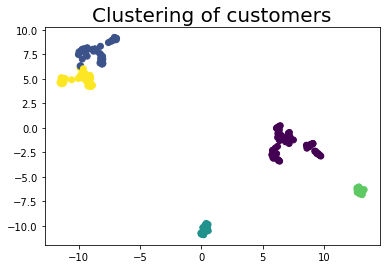

In [722]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=5, covariance_type = 'diag', random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(umap_results)

print("The silhouette score of the GMM: {}"
      .format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))


# Plot the solution.
plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.title('Clustering of customers',fontsize=20)

plt.show()



Observation:
- We can see 5 different clusters.

### GMM Using Annual Income and Spending score:

The silhouette score of the GMM: 0.44554665984545394


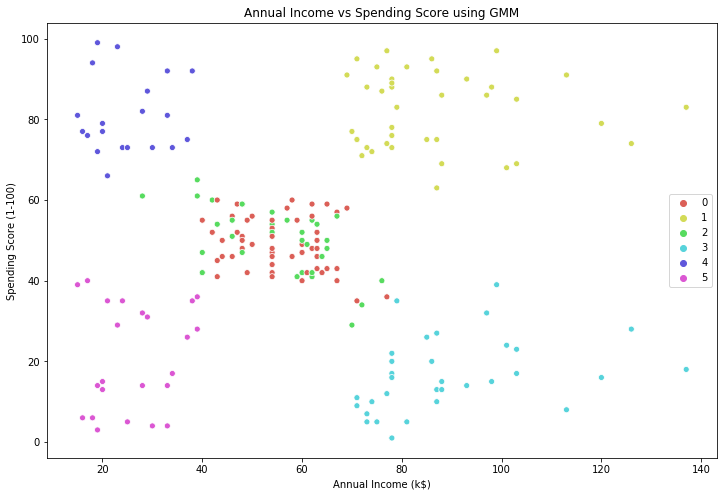

In [662]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=6, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(x)

print("The silhouette score of the GMM: {}"
      .format(metrics.silhouette_score(x, clusters, metric='euclidean')))

# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=clusters, 
                palette=sns.color_palette('hls', 6))
plt.title('Annual Income vs Spending Score using GMM')
plt.show()



The silhouette score of the GMM: 0.4268789464126624


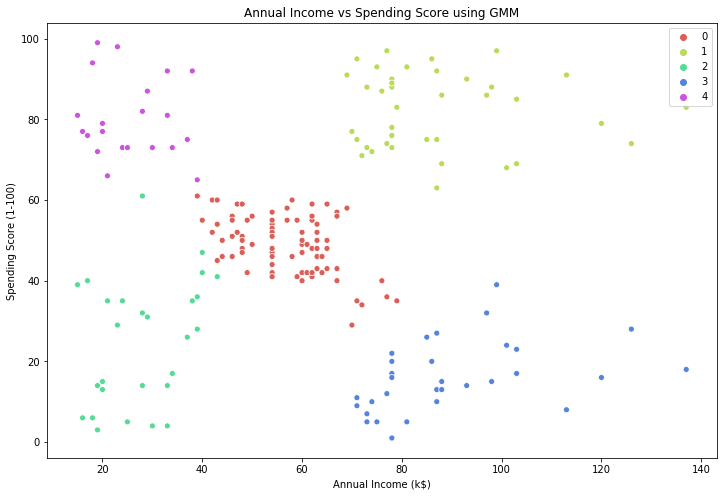

In [663]:
# Using 5 n_components:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=5, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(x)

print("The silhouette score of the GMM: {}"
      .format(metrics.silhouette_score(x, clusters, metric='euclidean')))

# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=clusters, 
                palette=sns.color_palette('hls', 5))
plt.title('Annual Income vs Spending Score using GMM')
plt.show()


Observation:
- Here 5 components gives us better visualization than with 6.

### GMM Using Age and Spending score:

The silhouette score of the GMM: 0.44554665984545394


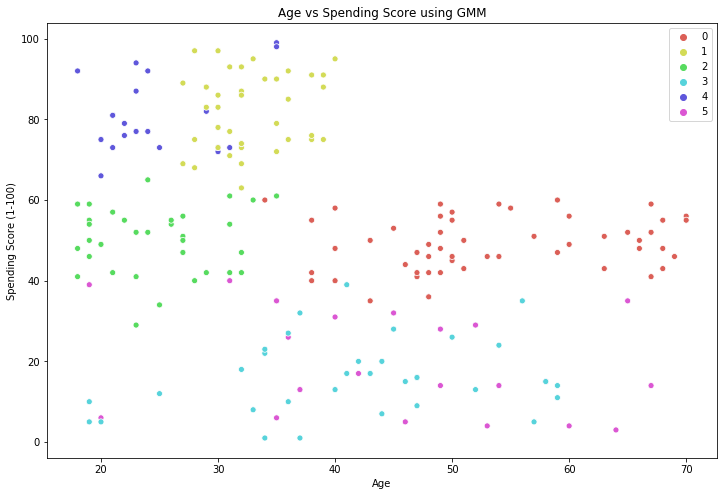

In [670]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=6, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(x)

print("The silhouette score of the GMM: {}"
      .format(metrics.silhouette_score(x, clusters, metric='euclidean')))

# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Age'], x['Spending Score (1-100)'], hue=clusters, 
                palette=sns.color_palette('hls', 6))
plt.title('Age vs Spending Score using GMM')
plt.show()


Observation:


### GMM Using Age and Annual Income:

The silhouette score of the GMM: 0.37746946513753726


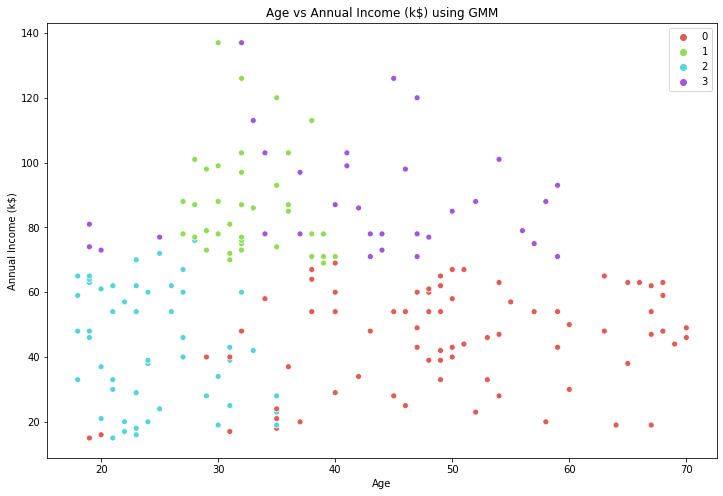

In [675]:
# Defining the GMM clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(x)

print("The silhouette score of the GMM: {}"
      .format(metrics.silhouette_score(x, clusters, metric='euclidean')))

# Plot the solution.
plt.figure(figsize=(12, 8))
sns.scatterplot(x['Age'], x['Annual Income (k$)'], hue=clusters, 
                palette=sns.color_palette('hls', 4))
plt.title('Age vs Annual Income (k$) using GMM')
plt.show()


Observation:
-Using 4 components gives me a little better visualization here of groups.

### Looking back to all different kind of clustering method and its results to compare:

#### First only clusters using UMAP reduction method:

20.9 ms ± 555 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


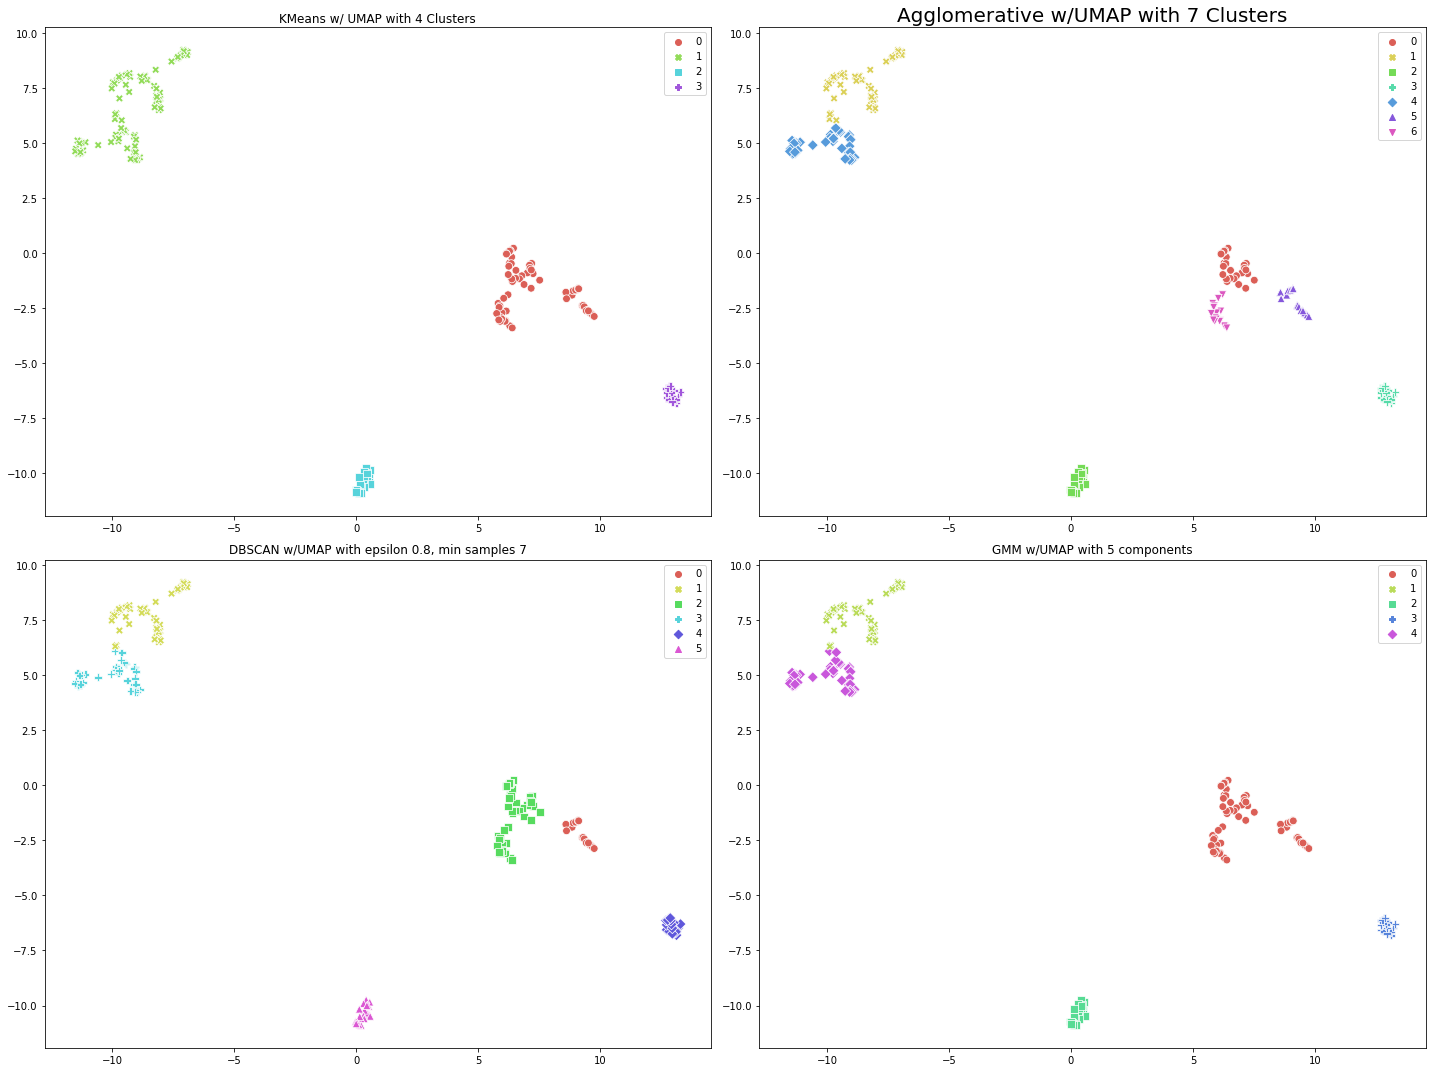

In [731]:
fig = plt.figure(figsize=(20,15))

##### KMeans UMAP #####
ax = fig.add_subplot(221)
k_means = KMeans(n_clusters=4, random_state=123)
%timeit k_means.fit(umap_results)
y_pred = k_means.predict(umap_results)

# Plot the solution.
sns.scatterplot(umap_results[:,0], umap_results[:,1], hue=y_pred, style=y_pred,
                palette=sns.color_palette('hls', 4), s=60, ax=ax)
ax.set_title('KMeans w/ UMAP with 4 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=7, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(umap_results)

# Plot the solution.
sns.scatterplot(umap_results[:,0], umap_results[:,1], hue=clusters, style=clusters,
                palette=sns.color_palette('hls', 7), s=60, ax=ax)
ax.set_title('Agglomerative w/UMAP with 7 Clusters',fontsize=20)



##### DBSCAN #####
ax = fig.add_subplot(223)
# Defining the DBSCAN clustering
dbscan_cluster = DBSCAN(eps=0.8, min_samples=7)

# Fit model
cluster = dbscan_cluster.fit_predict(umap_results)

# Plot the solution.
sns.scatterplot(umap_results[:,0], umap_results[:,1], hue=cluster, style=cluster, s=60,
                palette=sns.color_palette('hls', np.unique(cluster).shape[0]), ax=ax)
ax.set_title('DBSCAN w/UMAP with epsilon 0.8, min samples 7')



##### GMM #####
ax = fig.add_subplot(224)

# Defining the GMM clustering
gmm_cluster = GaussianMixture(n_components=5, covariance_type = 'diag', random_state=123)

# Fit model
cluster_g = gmm_cluster.fit_predict(umap_results)

# Plot the solution.
sns.scatterplot(umap_results[:,0], umap_results[:,1], hue=cluster_g, style=cluster_g, s=60,
                palette=sns.color_palette('hls', 5), ax=ax)
ax.set_title('GMM w/UMAP with 5 components')



plt.tight_layout()
plt.show()


Observation: UMAP reduced data:
- KMeans w/UMAP gives me 4 clusters, and silhouette score of 0.82
- Agglomerative w/UMAP gives me 7 clusters, and silhouette score of 0.684
- DBSCAN w/UMAP gives me 6 clusters, and silhouette score of 0.697
- GMM w/UMAP gives me 5 clusters, and silhouette score of 0.682

- From above, I can say that 4 cluster using KMeans gives us better score than others, as KMeanns for cluster 5 is 0.68.
- As my prediction I could say that DBSCAN did better than others because I could see better grouping here than using other clustering techniques.

Observation: Original data:
- It is really hard to see proper grouping using Age and Spending Score, and Age and Annual Income.
- Using Annual Income and Spending Score is better to find different similar groups.
      - Using KMeans: 5 groups and 0.44 score
      - Using Agglomerative: 7 groups and 0.41 score
      - Using DBSCAN: 4 groups, lots of outliers and 0.15 score
      - Using GMM: 5 groups and 0.41 score and 5 groups and lotes of outliers and 0.44 score

## Conclusion:

- After using different reduction technique, I found UMAP as a better reduction technique because it is fast, and works similar to PCA, also it gave me better visualization on groups.
- When I used original data without any reduction technique, I was able to see only similarities between two groups which are Annual Income and Spending Score and I was able to distribute people according to similarities.
   - I found GMM clustering method better than other as it was able to find 5 different groups in any cluster numbers.
   - Looking at my prediction, I found Agglomerative better because it was able to find similarities of people with higher income above 100k.
- Looking at all the results and clustering for further data processing/prediction, I will use data from Agglomerative Clustering of Annual Income and Spending from original datasets.